In [1]:
import numpy as np
import pandas as pd
import networkx as nx
#import json
#import os
import page_ranker as pr
#import import_graph as ig
import inspect_subgraph as isg

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
N=16

In [3]:
star = nx.star_graph(N)
G = nx.MultiDiGraph()
for e in star.edges:
    G.add_edge(e[0],e[1])

nx.set_node_attributes(G,'vanilla', 'type')
nx.set_edge_attributes(G,'vanilla', 'type')

In [4]:
G.nodes[0]

{'type': 'vanilla'}

In [5]:
G.edges[(0,1,0)]

{'type': 'vanilla'}

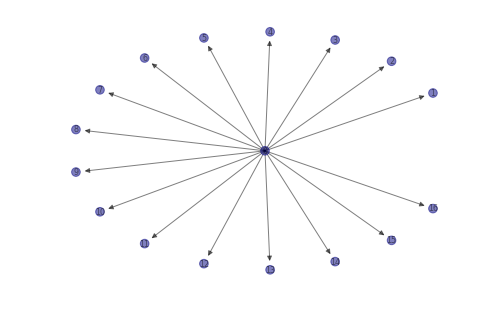

In [6]:
isg.inspectSubGraph(G, G.nodes, expand=False, verbose=False, label=True,pos = "kk")

In [59]:
alpha = .1
iterations = 50

seed = {n:1/len(G.nodes) for n in G.nodes}
#seed = {n:0 for n in G.nodes}
#seed[0] =1

node_wt_by_type = {'vanilla': 1}
edge_wt_by_type = {'vanilla': (1,.1)}

self_loop_wt= .1

In [60]:
r, df, g = pr.pageRanker(G,
                         alpha,
                         iterations,
                         seed=seed,
                         initial_value = seed,
                         lazy=False,
                         self_loop_wt=self_loop_wt, 
                         node_wt_by_type =node_wt_by_type,
                         edge_wt_by_type=edge_wt_by_type)

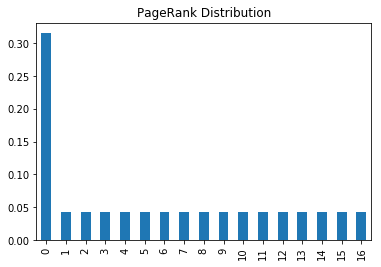

In [61]:
df.tail(1).T.plot(kind='bar',legend=False, title='PageRank Distribution')

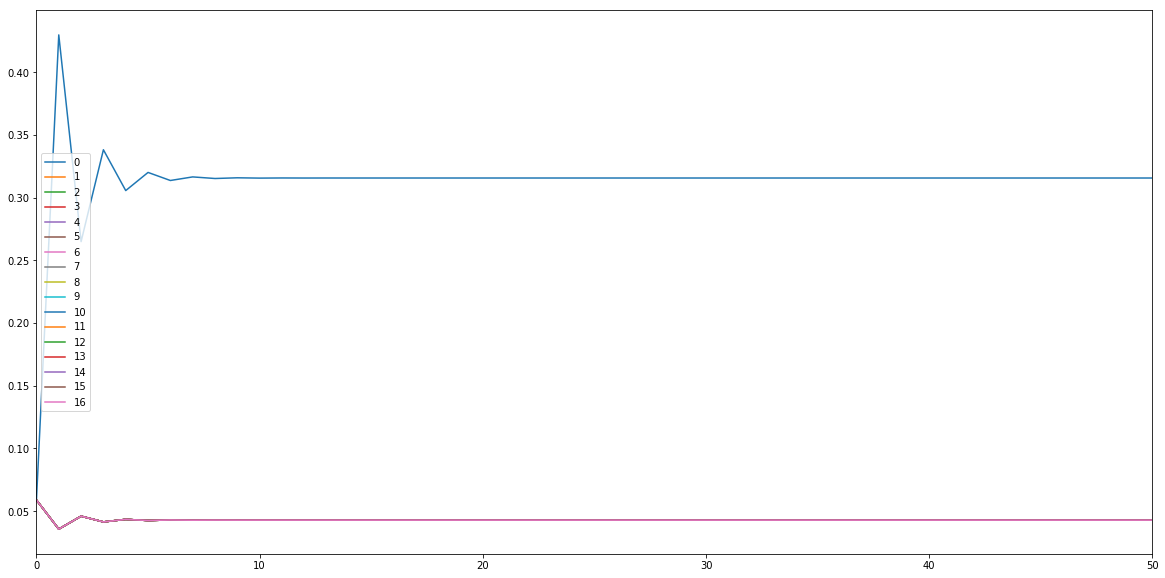

In [62]:
df.plot( figsize=(20,10))

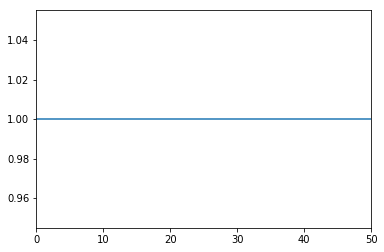

In [63]:
df.sum(axis=1).plot()

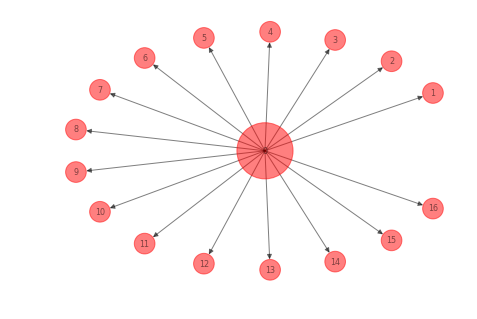

In [64]:
ns = [10000*G.nodes[n]['score'] for n in G.nodes]
nl = {n:n for n in G.nodes}

nx.draw_kamada_kawai(G, node_size=ns, labels=nl, font_size=8, alpha=.5)

In [13]:
nx.get_node_attributes(G,'self_wt')

{0: 0.1,
 1: 0.1,
 2: 0.1,
 3: 0.1,
 4: 0.1,
 5: 0.1,
 6: 0.1,
 7: 0.1,
 8: 0.1,
 9: 0.1,
 10: 0.1,
 11: 0.1,
 12: 0.1,
 13: 0.1,
 14: 0.1,
 15: 0.1,
 16: 0.1}

In [14]:
nx.get_edge_attributes(G,'out_weight')

{(0, 1, 0): 0.5,
 (0, 2, 0): 0.5,
 (0, 3, 0): 0.5,
 (0, 4, 0): 0.5,
 (0, 5, 0): 0.5,
 (0, 6, 0): 0.5,
 (0, 7, 0): 0.5,
 (0, 8, 0): 0.5,
 (0, 9, 0): 0.5,
 (0, 10, 0): 0.5,
 (0, 11, 0): 0.5,
 (0, 12, 0): 0.5,
 (0, 13, 0): 0.5,
 (0, 14, 0): 0.5,
 (0, 15, 0): 0.5,
 (0, 16, 0): 0.5}

In [15]:
nx.get_edge_attributes(G,'in_weight')

{(0, 1, 0): 1,
 (0, 2, 0): 1,
 (0, 3, 0): 1,
 (0, 4, 0): 1,
 (0, 5, 0): 1,
 (0, 6, 0): 1,
 (0, 7, 0): 1,
 (0, 8, 0): 1,
 (0, 9, 0): 1,
 (0, 10, 0): 1,
 (0, 11, 0): 1,
 (0, 12, 0): 1,
 (0, 13, 0): 1,
 (0, 14, 0): 1,
 (0, 15, 0): 1,
 (0, 16, 0): 1}

In [16]:
nx.get_node_attributes(G,'total_wt')

{0: 16.1,
 1: 0.6,
 2: 0.6,
 3: 0.6,
 4: 0.6,
 5: 0.6,
 6: 0.6,
 7: 0.6,
 8: 0.6,
 9: 0.6,
 10: 0.6,
 11: 0.6,
 12: 0.6,
 13: 0.6,
 14: 0.6,
 15: 0.6,
 16: 0.6}

In [19]:
slwts = [1,.3,.1,.03,.01]
alpha=.1
R= np.zeros((len(slwts),N+1))
i=0
for slwt in slwts:
    r, __, g = pr.pageRanker(G,
                             alpha,
                             iterations,
                             seed=seed,
                             initial_value = seed,
                             lazy=True,
                             lazy_decay = True,
                             self_loop_wt=slwt, 
                             node_wt_by_type =node_wt_by_type,
                             edge_wt_by_type=edge_wt_by_type)

    R[i,:] = r
    i=i+1


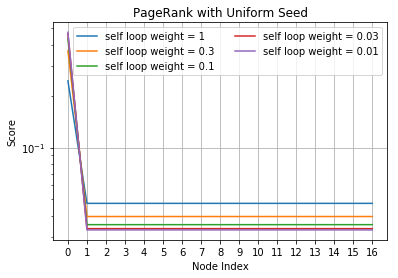

In [20]:
x= [n for n in range(N+1)]
plt.semilogy(x,R.T)
plt.legend(['self loop weight = '+str(s) for s in slwts],loc='upper right',ncol=2)
plt.title('PageRank with Uniform Seed, alpha =.1')
plt.ylabel('Score')
plt.xlabel('Node Index')
ax = plt.axes()
ax.set_xticks(x)
ax.grid()

In [28]:
slwts = [1,.3,.1,.03,.01]
upwts = [.3,.1,.03,.01,.003,.001]
alpha=.1
R= np.zeros((len(upwts),N+1))
i=0
for upwt in upwts:
    edge_wt_by_type = {'vanilla': (1,upwt)}
    r, __, g = pr.pageRanker(G,
                             alpha,
                             iterations,
                             seed=seed,
                             initial_value = seed,
                             lazy=True,
                             lazy_decay = True,
                             self_loop_wt=self_loop_wt, 
                             node_wt_by_type =node_wt_by_type,
                             edge_wt_by_type=edge_wt_by_type)

    R[i,:] = r
    i=i+1


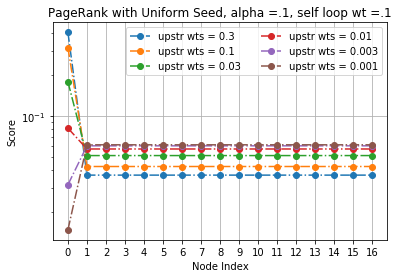

In [35]:
x= [n for n in range(N+1)]
plt.semilogy(x,R.T, '-.o')
plt.legend(['upstr wts = '+str(s) for s in upwts],loc='upper right',ncol=2)
plt.title('PageRank with Uniform Seed, alpha =.1, self loop wt =.1')
plt.ylabel('Score')
plt.xlabel('Node Index')
ax = plt.axes()
ax.set_xticks(x)
ax.grid()